#Soft Computing
##Haar wavelet transformacija


In [1]:
%matplotlib inline

import pywt
from pywt import WaveletPacket2D
import matplotlib.pyplot as plt
import random
from sklearn import datasets
from sklearn import svm
%matplotlib inline

In [2]:
digits = datasets.load_digits()

In [3]:
print(digits.data)
print(len(digits.data))

[[  0.   0.   5. ...,   0.   0.   0.]
 [  0.   0.   0. ...,  10.   0.   0.]
 [  0.   0.   0. ...,  16.   9.   0.]
 ..., 
 [  0.   0.   1. ...,   6.   0.   0.]
 [  0.   0.   2. ...,  12.   0.   0.]
 [  0.   0.  10. ...,  12.   1.   0.]]
1797


In [4]:
sample = 456
x = digits.images[sample]

In [5]:
print(x)
print(digits.target[sample])

[[  0.   0.   0.   2.  16.  15.   3.   0.]
 [  0.   0.   0.   8.  16.  16.   4.   0.]
 [  0.   0.   9.  16.  16.  14.   0.   0.]
 [  0.   7.  16.  16.  16.  12.   0.   0.]
 [  0.   0.   0.   8.  16.  12.   0.   0.]
 [  0.   0.   0.   7.  16.  12.   0.   0.]
 [  0.   0.   0.   4.  16.  16.   7.   0.]
 [  0.   0.   0.   0.  13.  16.   7.   0.]]
1


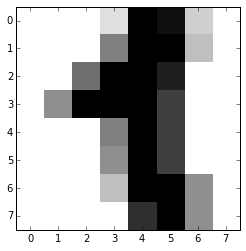

In [6]:
plt.imshow(x, cmap=plt.cm.gray_r, interpolation='nearest')

In [7]:
wp = pywt.WaveletPacket2D(data=x, wavelet='db1', mode='sym')

In [8]:
print(wp)

: [[  0.   0.   0.   2.  16.  15.   3.   0.]
 [  0.   0.   0.   8.  16.  16.   4.   0.]
 [  0.   0.   9.  16.  16.  14.   0.   0.]
 [  0.   7.  16.  16.  16.  12.   0.   0.]
 [  0.   0.   0.   8.  16.  12.   0.   0.]
 [  0.   0.   0.   7.  16.  12.   0.   0.]
 [  0.   0.   0.   4.  16.  16.   7.   0.]
 [  0.   0.   0.   0.  13.  16.   7.   0.]]


a - LL, low-low coefficients
h - LH, low-high coefficients
v - HL, high-low coefficients
d - HH, high-high coefficients

In [9]:
print wp['a'].data

[[  0.    5.   31.5   3.5]
 [  3.5  28.5  29.    0. ]
 [  0.    7.5  28.    0. ]
 [  0.    2.   30.5   7. ]]


In [10]:
new_wp = pywt.WaveletPacket2D(data=None, wavelet='db1', mode='sym')

In [11]:
new_wp['a'] =wp['a'].data
new_wp['h'] =wp['h'].data
new_wp['v'] =wp['v'].data
new_wp['d'] =[[0,0,0,0],[0,0,0,0],[0,0,0,0],[0,0,0,0]]

In [13]:
ww = new_wp.reconstruct(update=False)
print ww

[[  0.     0.    -1.5    3.5   15.75  15.25   3.25  -0.25]
 [  0.     0.     1.5    6.5   16.25  15.75   3.75   0.25]
 [ -1.75   1.75  10.75  14.25  16.5   13.5    0.     0.  ]
 [  1.75   5.25  14.25  17.75  15.5   12.5    0.     0.  ]
 [  0.     0.     0.25   7.75  16.    12.     0.     0.  ]
 [  0.     0.    -0.25   7.25  16.    12.     0.     0.  ]
 [  0.     0.     1.     3.    15.25  16.75   7.     0.  ]
 [  0.     0.    -1.     1.    13.75  15.25   7.     0.  ]]


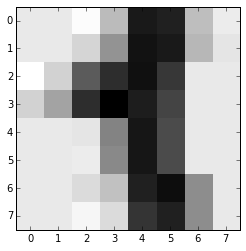

In [15]:
plt.imshow(ww, cmap=plt.cm.gray_r, interpolation='nearest')

In [16]:
clf = svm.SVC(gamma=0.001, C=100)

In [17]:
X,y = digits.data[:-10], digits.target[:-10]

In [18]:
clf.fit(X,y)

SVC(C=100, cache_size=200, class_weight=None, coef0=0.0, degree=3,
  gamma=0.001, kernel='rbf', max_iter=-1, probability=False,
  random_state=None, shrinking=True, tol=0.001, verbose=False)

In [20]:
import numpy as np
wN = np.array(ww).flatten()
print(wN)

[  0.     0.    -1.5    3.5   15.75  15.25   3.25  -0.25   0.     0.     1.5
   6.5   16.25  15.75   3.75   0.25  -1.75   1.75  10.75  14.25  16.5   13.5
   0.     0.     1.75   5.25  14.25  17.75  15.5   12.5    0.     0.     0.
   0.     0.25   7.75  16.    12.     0.     0.     0.     0.    -0.25
   7.25  16.    12.     0.     0.     0.     0.     1.     3.    15.25
  16.75   7.     0.     0.     0.    -1.     1.    13.75  15.25   7.     0.  ]


In [21]:
print(clf.predict(wN))

[1]
